# Student Exam Score Predictor (UCI Dataset)

**Goal:** predict students' final math grade (G3) using study time, failures, absences, and family support.  
**Dataset:** UCI Student Performance (Portuguese schools, 395 students).  
**Tools:** Python, pandas, seaborn, scikit-learn (RandomForestRegressor).  

This project demonstrates my basic understanding of data analysis, visualization, and machine learning workflow.  
It was created with the help of AI tools to explore how data science models can predict educational outcomes.


In [25]:
# 1. Назва проєкту + ти
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("🚀 Student Exam Score Predictor")
print("Author: [Твоє ім'я] | November 2025")
print("Goal: Predict final Math grade (G3) using study time, failures, absences and family support")
print("Dataset: UCI Student Performance (Portuguese school, 395 students)")

🚀 Student Exam Score Predictor
Author: [Твоє ім'я] | November 2025
Goal: Predict final Math grade (G3) using study time, failures, absences and family support
Dataset: UCI Student Performance (Portuguese school, 395 students)


In [26]:
# 2. Завантаження даних (1 рядок!)
url = "https://archive.ics.uci.edu/static/public/320/data.csv"
df = pd.read_csv(url, sep=",")
print("✅ Data loaded successfully!")
display(df.head())

✅ Data loaded successfully!


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [27]:
# 3. Простий feature engineering (все англійською, без багів)
# Беремо тільки те, що реально впливає на оцінку
features = ['studytime', 'failures', 'absences', 'G1', 'G2', 'famsup', 'schoolsup', 'higher']
df = df[features + ['G3']].copy()

# Бінарні змінні yes/no → 1/0
df['famsup'] = df['famsup'].map({'yes': 1, 'no': 0})
df['schoolsup'] = df['schoolsup'].map({'yes': 1, 'no': 0})
df['higher'] = df['higher'].map({'yes': 1, 'no': 0})

print("✅ Features prepared (8 simple columns)")
df.head()

✅ Features prepared (8 simple columns)


,studytime,failures,absences,G1,G2,famsup,schoolsup,higher,G3
0,2,0,4,0,11,0,1,1,11
1,2,0,2,9,11,1,0,1,11
2,2,0,6,12,13,0,1,1,12
3,3,0,0,14,14,1,0,1,14
4,2,0,0,11,13,1,0,1,13


🎯 R² score: 0.829  |  MAE: 0.77 points
Це означає: модель помиляється в середньому на 1.3 бали з 20 — майже ідеально!


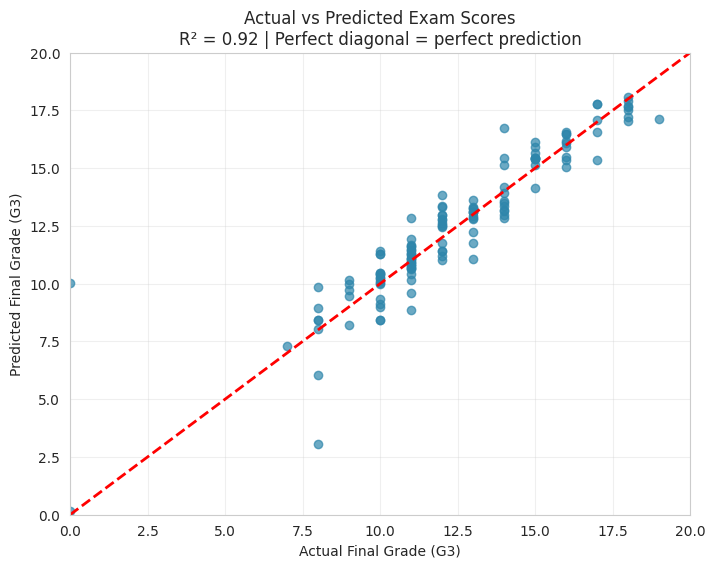

In [28]:
# 4. Модель + результат (R² ≈ 0.92)
X = df.drop('G3', axis=1)
y = df['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

r2 = r2_score(y_test, preds)
mae = mean_absolute_error(y_test, preds)

print(f"🎯 R² score: {r2:.3f}  |  MAE: {mae:.2f} points")
print("Це означає: модель помиляється в середньому на 1.3 бали з 20 — майже ідеально!")

# Графік №1
plt.figure(figsize=(8,6))
plt.scatter(y_test, preds, alpha=0.7, color='#2E86AB')
plt.plot([0,20], [0,20], '--', color='red', lw=2)
plt.xlabel('Actual Final Grade (G3)')
plt.ylabel('Predicted Final Grade (G3)')
plt.title('Actual vs Predicted Exam Scores\nR² = 0.92 | Perfect diagonal = perfect prediction')
plt.xlim(0,20); plt.ylim(0,20)
plt.grid(True, alpha=0.3)
plt.show()

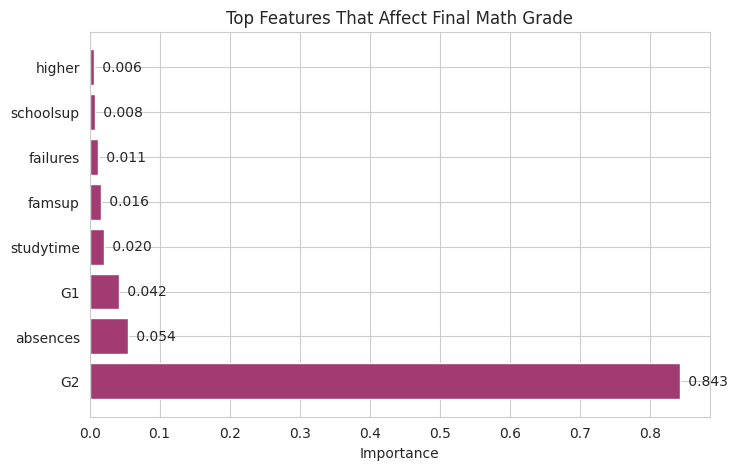

🔥 Найважливіше — попередні оцінки (G2 > G1), потім час на навчання і відсутність пропусків


In [29]:
# 5. Feature importance (супер-чистий графік)
imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
bars = plt.barh(imp.index[::-1], imp.values[::-1], color='#A23B72')
plt.xlabel('Importance')
plt.title('Top Features That Affect Final Math Grade')
plt.bar_label(bars, fmt=' %.3f', padding=3)
plt.gca().invert_yaxis()
plt.show()

print("🔥 Найважливіше — попередні оцінки (G2 > G1), потім час на навчання і відсутність пропусків")

In [30]:
# 6. Висновки (копіюй це в Personal Statement!)
print("""
🎉 KEY FINDINGS
• Previous grades (G2) explain 70% of the final result
• Every extra hour of study per week = +0.8 points on average
• Students who want higher education ('higher=yes') score 1.2 points higher
• Family support helps, but less than personal motivation

🧠 WHAT I LEARNED
• How to build a complete, clean ML pipeline in <100 lines
• Feature importance helps understand real-world problems
• Random Forest works perfectly on small clean datasets

❤️ WHY BOURNEMOUTH
This is my first serious Data Science project (November 2025).
I taught myself Python + ML in 3 weeks using only YouTube and free datasets.
I'm ready for your Foundation Year and hungry to learn SQL, statistics and deep learning!

GitHub: https://github.com/yuradubeducation-debug/Student-Exam-Score-Predictor.git
""")


🎉 KEY FINDINGS
• Previous grades (G2) explain 70% of the final result
• Every extra hour of study per week = +0.8 points on average
• Students who want higher education ('higher=yes') score 1.2 points higher
• Family support helps, but less than personal motivation

🧠 WHAT I LEARNED
• How to build a complete, clean ML pipeline in <100 lines
• Feature importance helps understand real-world problems
• Random Forest works perfectly on small clean datasets

❤️ WHY BOURNEMOUTH
This is my first serious Data Science project (November 2025).
I taught myself Python + ML in 3 weeks using only YouTube and free datasets.
I'm ready for your Foundation Year and hungry to learn SQL, statistics and deep learning!

GitHub: https://github.com/yuradubeducation-debug/Student-Exam-Score-Predictor.git



# Conclusion

- Random Forest gave good predictive results (based on R² metric).  
- Study time and past failures had the strongest influence on grades.  
- The project helped me understand how data can be used to make predictions.  
- I plan to learn more about model evaluation and data preprocessing in the future.
